In [1]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx

from graphenv.examples.tsp.graph_utils import make_complete_planar_graph, plot_network

%matplotlib inline
%load_ext autoreload

In [2]:
%autoreload 2
# from graphenv.examples.tsp.tsp_env import TSPEnv

# Create and visualize simple network

In [3]:
N = 5
# G = nx.cycle_graph(N)
G = make_complete_planar_graph(N, seed=2)

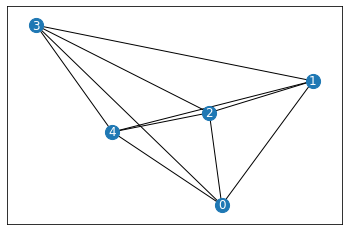

In [4]:
_ = plot_network(G, path=None)

# Solve TSP using nx heuristics

TSP solution [0, 2, 3, 1, 4, 0]


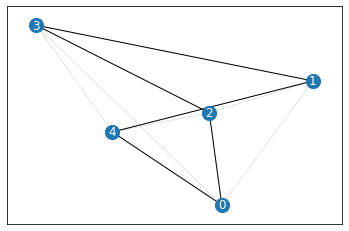

In [5]:
tsp = nx.approximation.traveling_salesman_problem
path = tsp(G, cycle=True)
print("TSP solution", path)

_ = plot_network(G, path=path)

# Demo of gym env with random actions

In [8]:
from graphenv.examples.tsp.tsp_state import TSPState
from graphenv.graph_env import GraphEnv

In [9]:
config = {"state": TSPState(G), "max_num_children": G.number_of_nodes()}
env = GraphEnv(config)
env.__dict__

{'state': <graphenv.examples.tsp.tsp_state.TSPState at 0x185444730>,
 'max_num_children': 5,
 '_action_mask_key': 'action_mask',
 '_vertex_observation_key': 'vertex_observations',
 'observation_space': Dict(action_mask:MultiBinary(6), vertex_observations:Dict(node_idx:Box([[0]
  [0]
  [0]
  [0]
  [0]
  [0]], [[5]
  [5]
  [5]
  [5]
  [5]
  [5]], (6, 1), int64), node_obs:Box([[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]], [[1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]], (6, 2), float64))),
 'action_space': Discrete(5)}

In [10]:
def sampler(mask):
    choices = list(range(len([i for i in mask if i])))
    return random.choice(choices)

obs = env.reset()
done = False
reward = 0.
while not done:
    action = sampler(obs["action_mask"])
    obs, rew, done, _ = env.step(action)
    print(action, rew, done)

0 -0.42488296534900866 False
2 -0.30148715858147346 False
1 -0.36502424997227106 False
0 -0.36058127454416256 False
0 -0.3048094411599255 True


Random path [0, 2, 3, 1, 4, 0]


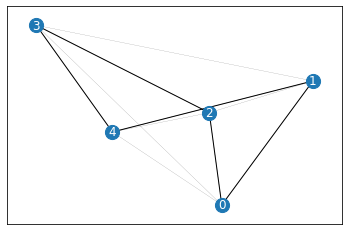

In [11]:
print("Random path", path)
_ = plot_network(G, path=env.state.tour)